In [1]:
import os
import pandas as pd
snmem="/gpfs/scratch/ahurtado/large_polar_low"
ahurt="/home/adrianhurtado/testing/madness-test-suite/large_polar_low/"
os.chdir(ahurt)
from madnessReader import MadnessReader
from madnessReader import ExcitedData
from madnessReader import FrequencyData
from madnessReader import *
from daltonRunner import DaltonRunner
import matplotlib.pyplot as plt
dalton_reader = DaltonRunner()
dalton_reader.Np=4

4
4


In [2]:
basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ','aug-cc-pV5Z','aug-cc-pV6Z']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ','d-aug-cc-pV5Z','d-aug-cc-pV6Z']

In [3]:
import json
converged=[]
not_converged=[]
not_found=[]
json_error=[]
for g in glob.glob('molecules/*.mol'):
    m = g.split('/')
    mol = m[1].split('.')[0]
    try:
        ben=FrequencyData(mol,'hf','dipole')
        if ben.converged.all():
            converged.append(mol)
        else:
            not_converged.append(mol)
    except FileNotFoundError as f:
        print(mol,f)
        not_found.append(mol)
    except json.decoder.JSONDecodeError as j:
        json_error.append(mol)
        print(mol,j)
        
            


LiH_s Expecting value: line 1 column 1 (char 0)
SH2 Expecting value: line 1 column 1 (char 0)
0.0525905  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/P2/dipole_hf_0-052590/response_base.json'
NaCN Expecting value: line 1 column 1 (char 0)
Na2 Expecting value: line 1 column 1 (char 0)
N2 Expecting value: line 1 column 1 (char 0)
SiH4 Expecting value: line 1 column 1 (char 0)
N2H2 Expecting value: line 1 column 1 (char 0)
NH3 Expecting value: line 1 column 1 (char 0)
N2H4 Expecting value: line 1 column 1 (char 0)
SiH3F Expecting value: line 1 column 1 (char 0)
SiO Expecting value: line 1 column 1 (char 0)
FNO [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/FNO/calc_info.json'
S2H2 [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/S2H2/calc_info.json'
LiCl Expecting value: line 1 column 1 (char 0)
PH3O Expecting

In [91]:
num_c=len(converged)
num_n=len(not_converged)
num_nf=len(not_found)
num_json_e=len(json_error)

total=num_c+num_n+num_nf+num_json_e
print("converged : ",num_c)
print("not converged : ",num_n)
print("not found : ",num_nf)
print("json error : ",num_json_e)
print("total : ",total)


converged :  27
not converged :  41
not found :  2
json error :  20
total :  90


In [4]:
converged

['LiH',
 'Li2',
 'NaCl',
 'C2H2',
 'BH3',
 'CH3SH',
 'P2',
 'CH3OH',
 'HBS',
 'CH3NH2',
 'He',
 'HF',
 'Mg2',
 'Ne',
 'H2',
 'HCl',
 'Mg',
 'CH2BH',
 'CH3BH2',
 'H2O',
 'Ar',
 'C6H6',
 'LiBH4',
 'CH4',
 'BeH2',
 'BH2F',
 'Be']

In [8]:
not_converged_list='" "'.join(not_converged)
not_found_list='" "'.join(not_found)
json_error_list='" "'.join(json_error)
display(json_error)

['LiH_s',
 'SH2',
 'NaCN',
 'Na2',
 'N2',
 'SiH4',
 'N2H2',
 'NH3',
 'N2H4',
 'SiH3F',
 'SiO',
 'LiCl',
 'PH3O',
 'O3',
 'NH2Cl',
 'PH3',
 'NaLi',
 'NH2OH',
 'NaH',
 'NH2F']

In [9]:
if False:
    for mol in not_converged:
        print(mol)
        d=display_convergence_plots(mol,'hf','dipole',False)
    
    
    
    

P2 converged:  0.0              True
0.0065738125     True
0.013147625      True
0.02629525       True
0.0525905       False
dtype: bool


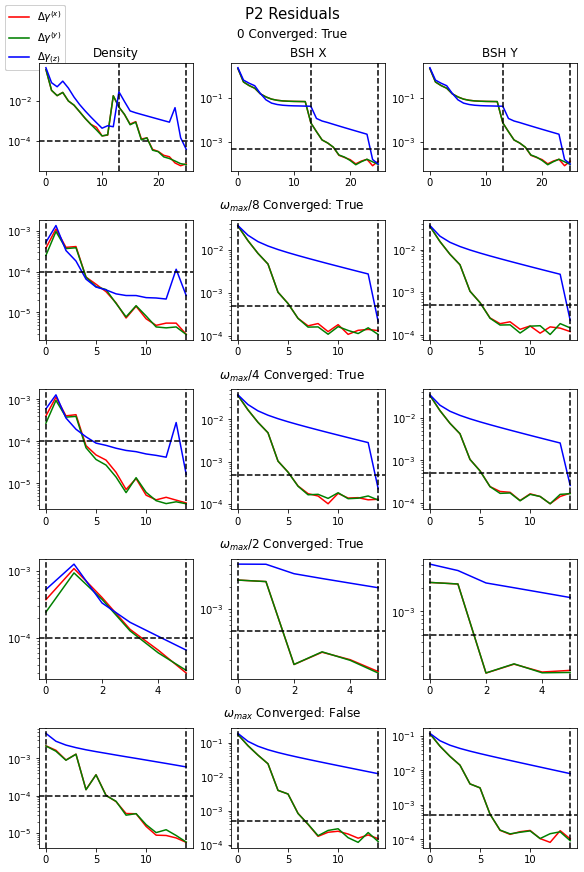

In [90]:
d=display_convergence_plots('P2','hf','dipole',False)
#create_polar_diff_plot('P2',d_basis_list[0:3])

In [13]:
display(not_found)
display(not_converged)
display(json_error)


['FNO', 'S2H2']

['CSO',
 'FCN',
 'P2H4',
 'OCl2',
 'HCONH2',
 'BH2Cl',
 'HCN',
 'C2H4',
 'SO2',
 'HNC',
 'F2',
 'NH3O',
 'HOF',
 'OF2',
 'ClF',
 'HCOOH',
 'CH3Cl',
 'HCHO',
 'SiH3Cl',
 'SF2',
 'HOCl',
 'HOOH',
 'HCCF',
 'BF',
 'BHF2',
 'HNS',
 'HBO',
 'Cl2',
 'LiCN',
 'CO',
 'CS',
 'CH2NH',
 'CH3F',
 'CO2',
 'ClCN',
 'HCHS',
 'SCl2',
 'HCCCl',
 'HNO',
 'HCP',
 'NOCl']

['LiH_s',
 'SH2',
 'NaCN',
 'Na2',
 'N2',
 'SiH4',
 'N2H2',
 'NH3',
 'N2H4',
 'SiH3F',
 'SiO',
 'LiCl',
 'PH3O',
 'O3',
 'NH2Cl',
 'PH3',
 'NaLi',
 'NH2OH',
 'NaH',
 'NH2F']

In [19]:
display(len(json_error))
l28='" "'.join(json_error[0:7])
e28='" "'.join(json_error[7:15])
l40='" "'.join(json_error[15:20])


20

In [20]:
display(e28)
display(l28)
display(l40)

'NH3" "N2H4" "SiH3F" "SiO" "LiCl" "PH3O" "O3" "NH2Cl'

'LiH_s" "SH2" "NaCN" "Na2" "N2" "SiH4" "N2H2'

'PH3" "NaLi" "NH2OH" "NaH" "NH2F'

In [13]:
e24

'N2H4" "SiH3F" "SiO" "LiCl" "PH3O" "O3'

In [14]:
l28

'NH2Cl" "PH3" "NaLi" "NH2OH" "NaH" "NH2F'

In [15]:
l24

''

In [21]:
not_converged

['CSO',
 'FCN',
 'P2H4',
 'OCl2',
 'HCONH2',
 'BH2Cl',
 'HCN',
 'C2H4',
 'SO2',
 'HNC',
 'F2',
 'NH3O',
 'HOF',
 'OF2',
 'ClF',
 'HCOOH',
 'CH3Cl',
 'HCHO',
 'SiH3Cl',
 'SF2',
 'HOCl',
 'HOOH',
 'HCCF',
 'BF',
 'BHF2',
 'HNS',
 'HBO',
 'Cl2',
 'LiCN',
 'CO',
 'CS',
 'CH2NH',
 'CH3F',
 'CO2',
 'ClCN',
 'HCHS',
 'SCl2',
 'HCCCl',
 'HNO',
 'HCP',
 'NOCl']

In [17]:
display(len(not_converged))
display(not_converged)


41

['CSO',
 'FCN',
 'P2H4',
 'OCl2',
 'HCONH2',
 'BH2Cl',
 'HCN',
 'C2H4',
 'SO2',
 'HNC',
 'F2',
 'NH3O',
 'HOF',
 'OF2',
 'ClF',
 'HCOOH',
 'CH3Cl',
 'HCHO',
 'SiH3Cl',
 'SF2',
 'HOCl',
 'HOOH',
 'HCCF',
 'BF',
 'BHF2',
 'HNS',
 'HBO',
 'Cl2',
 'LiCN',
 'CO',
 'CS',
 'CH2NH',
 'CH3F',
 'CO2',
 'ClCN',
 'HCHS',
 'SCl2',
 'HCCCl',
 'HNO',
 'HCP',
 'NOCl']

In [19]:
if False:
    for mol in converged:
        create_polar_diff_plot(mol,d_basis_list[0:3])

In [74]:

non_converged=[]
part_converged=[]
if True:
    for mol in not_converged[1:]:
        check=FrequencyData(mol,'hf','dipole')
        if(check.converged.any()):
            #print(mol,'\n',check.converged)
            part_converged.append(mol)
        else:
            non_converged.append(mol)
            
                
print(' '.join(part_converged))
print(len(part_converged))



OCl2 HCN C2H4 SO2 HNC F2 HOF OF2 ClF HCOOH CH3Cl HCHO SiH3Cl HOCl HOOH HCCF BF BHF2 HBO Cl2 LiCN CS CH2NH CH3F ClCN HCHS HCCCl HCP
28


HCP converged:  0.0             True
0.008237875     True
0.01647575     False
0.0329515      False
0.065903       False
dtype: bool


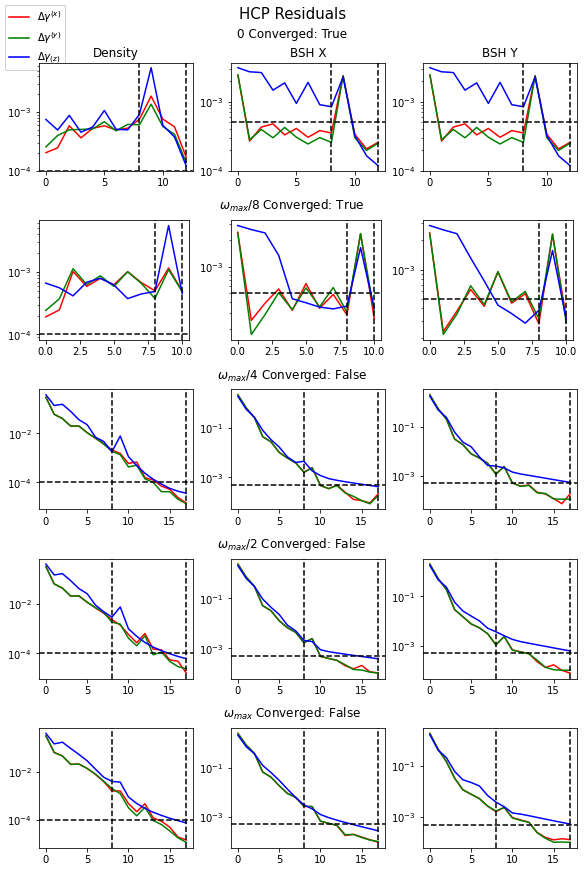

In [73]:
display_convergence_plots(part_converged[27],'hf','dipole',False)

In [75]:
print(' '.join(non_converged))
print(len(non_converged))

FCN P2H4 HCONH2 BH2Cl NH3O SF2 HNS CO CO2 SCl2 HNO NOCl
12


In [89]:
display_convergence_plots(non_converged[12],'hf','dipole',False)

IndexError: list index out of range